### Notebook: Time Independent Modeling

29 May 2024

Objectives:
- Make file dataframe file from AK and RY on 28 May
- Look over confusion matrix output
- Are there any better classification methods to use OR ways to maximize RandomForest?



In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# ------------------------------------------------

data_path = "../../main_data/locale_specific_data/"

### Update to dataframe --> New file:

In [2]:
dog_df = pd.read_csv(data_path + "Sonoma_nontime_cleaned_ry.csv").drop(["Unnamed: 0"], axis=1)

dog_df['sex_bin'] = 1*(dog_df.sex=="Female")

size_dict = {'PUPPY':0, 'TOY':1, 'SMALL':2, 'MED':3, 'LARGE':4,'X-LRG':5}
dog_df['size_bin'] = dog_df['size'].map(size_dict)
del size_dict

dog_df['breed_pit'] = 1*(dog_df.breed.str.contains("PIT"))

dog_df['color_mix'] = 1*((dog_df.color.str.contains("/"))|(dog_df.color.str.contains("TRICOLOR"))|(dog_df.color.str.contains("BRINDLE")))

intake_dict = {'STRAY':0, 'OWNER SURRENDER':1, 'ADOPTION RETURN':2, 'CONFISCATE':3, 'TRANSFER':4,'QUARANTINE':5, "BORN HERE":6}
dog_df['intake_bin'] = dog_df['intake_type'].map(intake_dict)
del intake_dict

dog_df.head(10)

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,...,outcome_adopt,outcome_adopt_subtype,intake_age,outcome_age,pop_control,sex_bin,size_bin,breed_pit,color_mix,intake_bin
0,PIT BULL,GRAY/WHITE,Female,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,...,False,none,0.97,1.61,1,1,3,1,1,4
1,PIT BULL,BLUE/WHITE,Female,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,...,False,none,0.89,1.51,1,1,3,1,1,0
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,...,False,none,6.03,6.90,0,0,3,0,1,0
3,CHIHUAHUA SH,TAN,Male,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,...,False,none,6.00,6.25,1,0,1,0,0,1
4,PIT BULL,TAN/WHITE,Male,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,...,True,realtime,0.95,1.57,1,0,3,1,1,0
5,PIT BULL/MIX,TAN/WHITE,Female,MED,2011-10-12,A298061,2013-10-09,2014-02-15,129,STRAY,...,True,realtime,1.99,2.34,1,1,3,1,1,0
6,PIT BULL,BLACK,Female,LARGE,2010-11-22,A298914,2013-10-30,2014-03-29,150,STRAY,...,True,realtime,2.94,3.35,1,1,4,1,0,0
7,CHIHUAHUA SH,BLACK/TAN,Male,TOY,2002-12-04,A299080,2013-11-02,2014-01-04,63,STRAY,...,True,realtime,10.91,11.08,1,0,1,0,1,0
8,CHIHUAHUA SH,BLUE/FAWN,Male,SMALL,2011-11-21,A299340,2013-11-12,2014-06-21,221,TRANSFER,...,True,realtime,1.98,2.59,1,0,2,0,1,4
9,TOY FOX TERRIER,WHITE/BLACK,Male,TOY,2005-04-01,A025040,2013-11-16,2014-01-31,76,OWNER SURRENDER,...,False,none,8.62,8.83,1,0,1,0,1,1


In [3]:
dog_df.to_csv(data+path + "Sonoma_time_independent_data_akry.csv", index=False)

In [4]:
del dog_df

### Return to time-independent modeling


In [7]:
dog_df = pd.read_csv(data_path + "Sonoma_time_independent_data_akry.csv")

dog_df.head()

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,...,outcome_adopt,outcome_adopt_subtype,intake_age,outcome_age,pop_control,sex_bin,size_bin,breed_pit,color_mix,intake_bin
0,PIT BULL,GRAY/WHITE,Female,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,...,False,none,0.97,1.61,1,1,3,1,1,4
1,PIT BULL,BLUE/WHITE,Female,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,...,False,none,0.89,1.51,1,1,3,1,1,0
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,...,False,none,6.03,6.90,0,0,3,0,1,0
3,CHIHUAHUA SH,TAN,Male,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,...,False,none,6.00,6.25,1,0,1,0,0,1
4,PIT BULL,TAN/WHITE,Male,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,...,True,realtime,0.95,1.57,1,0,3,1,1,0


#### Question: Is there a connection between adoption and how the dogs came to the shelter?


In [35]:
pd.crosstab(dog_df.intake_type, dog_df.outcome_type)

outcome_type,ADOPTION,DIED,DISPOSAL,ESCAPED/STOLEN,EUTHANIZE,RTOS,TRANSFER
intake_type,,,,,,,
ADOPTION RETURN,243,1,0,0,27,0,48
BORN HERE,0,1,0,0,0,0,5
CONFISCATE,113,1,6,1,55,3,109
OWNER SURRENDER,600,1,0,0,317,0,368
QUARANTINE,14,0,9,0,82,6,7
STRAY,2517,22,5,0,588,23,1175
TRANSFER,102,0,0,1,23,0,32


<Axes: xlabel='days_in_shelter', ylabel='intake_type'>

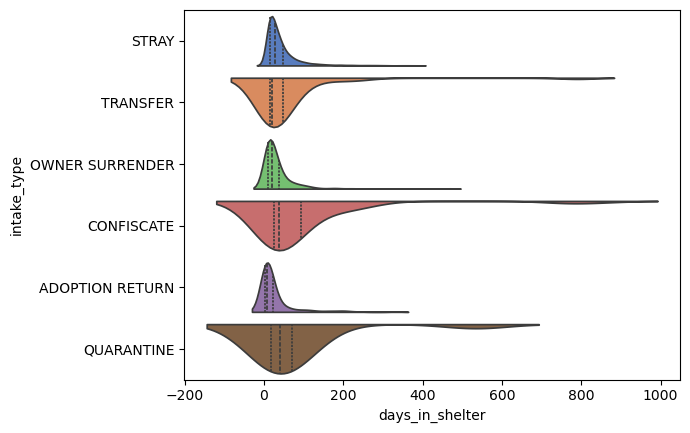

In [46]:
sns.violinplot(data=dog_df[dog_df.outcome_adopt==True],
            x='days_in_shelter', 
            y='intake_type',
            hue="intake_type", split=True, palette="muted", inner="quartile")

#### Question: What can we determine about use of adoption strategies?

In [16]:
dog_df.outcome_adopt.sum()

3589

<Axes: xlabel='intake_age', ylabel='days_in_shelter'>

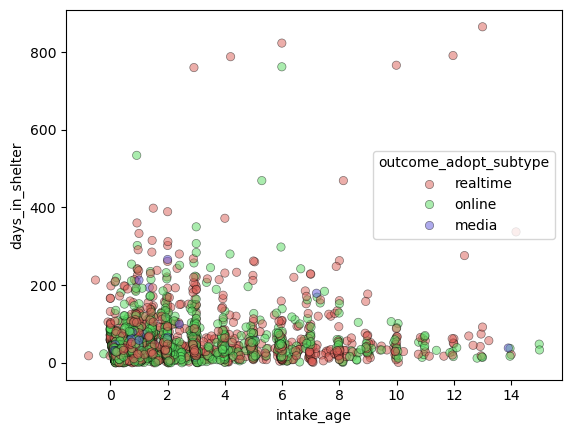

In [14]:
sns.scatterplot(data=dog_df[dog_df.outcome_adopt==True],
                y='days_in_shelter', x='intake_age', 
                hue='outcome_adopt_subtype', palette='hls', edgecolor='black', alpha=0.50 )

<Axes: xlabel='outcome_adopt_subtype', ylabel='days_in_shelter'>

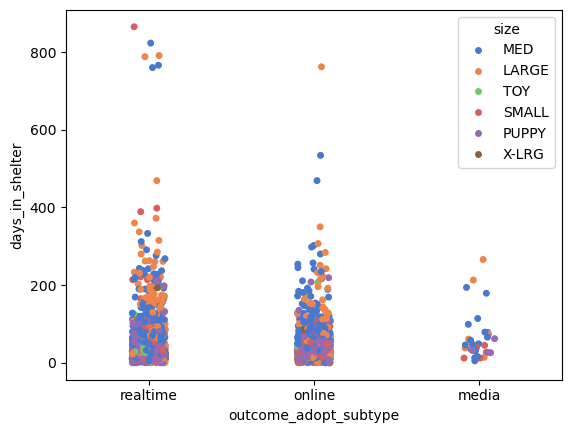

In [23]:
sns.stripplot(data=dog_df[dog_df.outcome_adopt==True],
              y='days_in_shelter', x='outcome_adopt_subtype',
              hue='size', palette="muted")

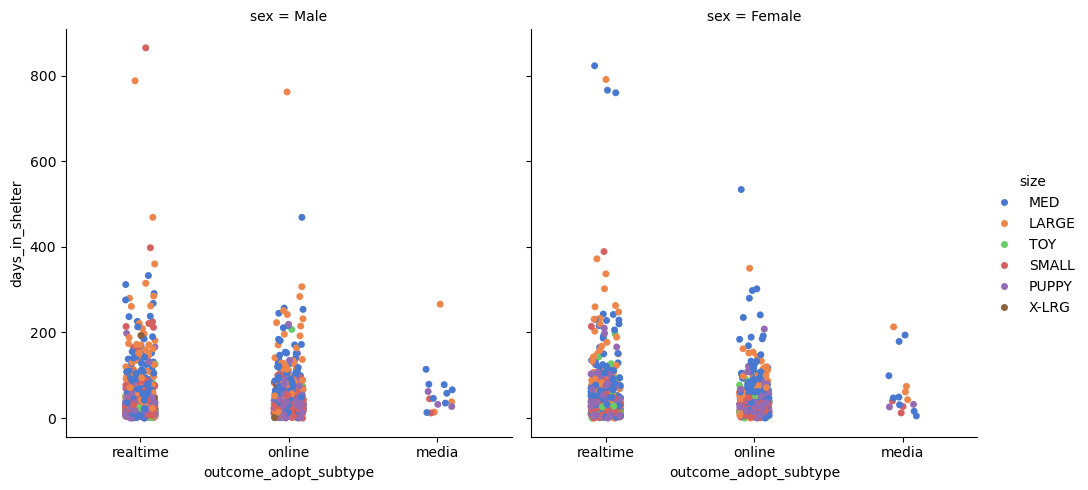

In [25]:
sns.catplot(data=dog_df[dog_df.outcome_adopt==True],
            y='days_in_shelter', x='outcome_adopt_subtype',
            col="sex",
            hue='size', palette="muted")

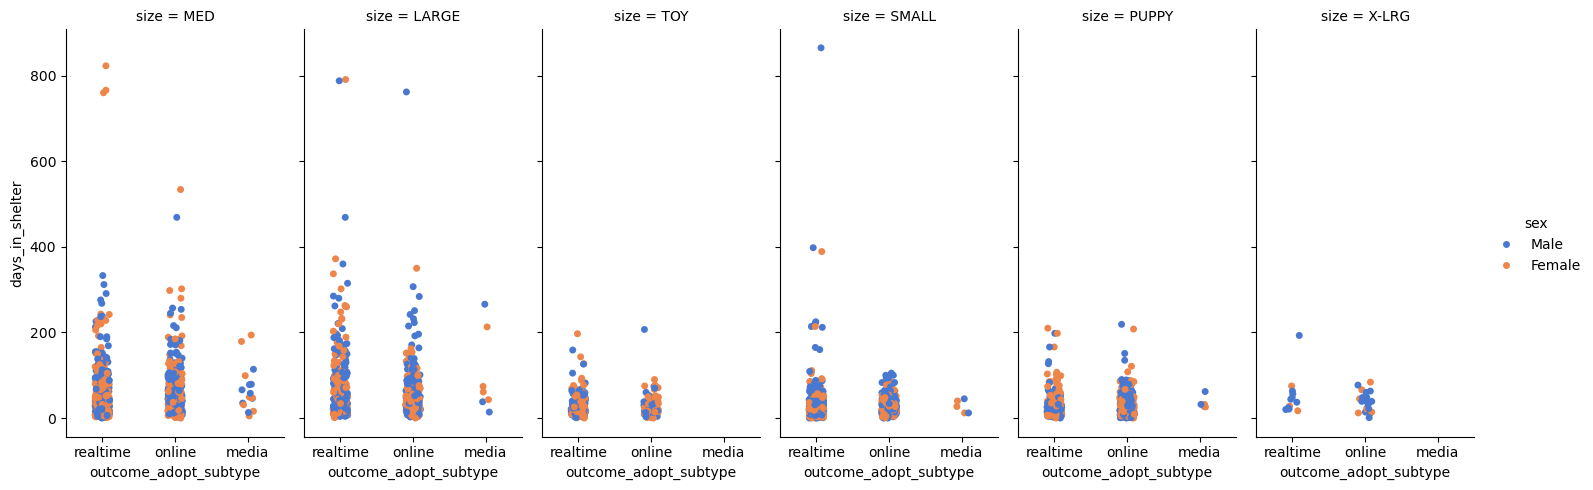

In [27]:
sns.catplot(data=dog_df[dog_df.outcome_adopt==True],
            y='days_in_shelter', x='outcome_adopt_subtype',
            col="size",
            hue='sex', palette="muted", aspect=0.5)